# Remote Work vs Travel Data

In [1]:
# Imports:
import pprint, json, csv, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests as rq
from pathlib import Path
# Add a config.py file and add a line that says 
# api_key = 'YOUR KEY HERE'
# replace "your key here" with your Geoapify api key
#from config import api_key


In [ ]:
url = ''

# this does not work, trying sample code
# outp = rq.post(bls_url).json()

# pprint(outp)

In [2]:
data = path.join("Resources/LAPD_Crimes_Filtered_2022.csv")
crime_data = pd.read_csv(data, sep="\t")

In [26]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,220216262,9/8/22 0:00,2022-09-08,1445,2,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1000 S BURLINGTON AV,NaN,34.0502,-118.2765
1,221809626,4/23/22 0:00,2022-04-22,2100,18,Southeast,1862,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,SAN PEDRO ST,120TH ST,33.9237,-118.2696
2,221711121,7/10/22 0:00,2022-07-10,200,17,Devonshire,1781,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8800 OSO AV,NaN,34.2299,-118.5754
3,220805283,1/24/22 0:00,2022-01-22,1445,8,West LA,855,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1600 CAMDEN AV,NaN,34.0501,-118.4439
4,221821212,11/27/22 0:00,2022-11-27,1635,18,Southeast,1826,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,91ST,COMPTON,33.9543,-118.2475


In [6]:
crime_data["DATE OCC"]=pd.to_datetime(crime_data["DATE OCC"])

In [25]:
cleaned = crime_data.loc[crime_data["LAT"]!=0,:]
cleaned.info()
crime_data = cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234310 entries, 0 to 234310
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           234310 non-null  int64         
 1   Date Rptd       234310 non-null  object        
 2   DATE OCC        234310 non-null  datetime64[ns]
 3   TIME OCC        234310 non-null  int64         
 4   AREA            234310 non-null  int64         
 5   AREA NAME       234310 non-null  object        
 6   Rpt Dist No     234310 non-null  int64         
 7   Part 1-2        234310 non-null  int64         
 8   Crm Cd          234310 non-null  int64         
 9   Crm Cd Desc     234310 non-null  object        
 10  Mocodes         202458 non-null  object        
 11  Vict Age        234310 non-null  int64         
 12  Vict Sex        204260 non-null  object        
 13  Vict Descent    204261 non-null  object        
 14  Premis Cd       234307 non-null  flo

In [27]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234310 entries, 0 to 234310
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           234310 non-null  int64         
 1   Date Rptd       234310 non-null  object        
 2   DATE OCC        234310 non-null  datetime64[ns]
 3   TIME OCC        234310 non-null  int64         
 4   AREA            234310 non-null  int64         
 5   AREA NAME       234310 non-null  object        
 6   Rpt Dist No     234310 non-null  int64         
 7   Part 1-2        234310 non-null  int64         
 8   Crm Cd          234310 non-null  int64         
 9   Crm Cd Desc     234310 non-null  object        
 10  Mocodes         202458 non-null  object        
 11  Vict Age        234310 non-null  int64         
 12  Vict Sex        204260 non-null  object        
 13  Vict Descent    204261 non-null  object        
 14  Premis Cd       234307 non-null  flo

In [ ]:
crime_data.columns

In [ ]:
crime_data.info()

In [ ]:
crime_status = crime_data["Status"]
crime_status.unique()
crime_status.value_counts()

In [ ]:
crime_status_desc = crime_data["Status Desc"]
crime_status_desc.value_counts()

In [ ]:
crime_data["Vict Sex"].value_counts()

In [ ]:
crime_data["Vict Age"].value_counts()

In [ ]:
crime_data["Vict Age"].mean()

In [ ]:
zero_age = crime_data.loc[crime_data["Vict Age"] == 0,:]
zero_age.head()

### Due to some reports containing a zero age, we have a few options to consider for the data.

- Because of the sizable amount, we can replace all 0 values to a random range within the mean (30) like 28-32.
- The option to outright discard the data is there, but losing 55955 data points along with crimes such as vehicular theft and burglary, it is a very big choice.
- We can always just leave it at 0 and determine why it was reported as age 0. Possibly because there were multiple victims in the scene.

In [ ]:
crime_type = crime_data["Crm Cd"]
crime_type.unique()

In [ ]:
crime_type.nunique()

In [ ]:
crime_type.value_counts()

In [ ]:
plt.figure(figsize=(20,20))
plt.bar(crime_type.unique(),crime_type.value_counts())

plt.show()

In [17]:
locations_df = crime_data.loc[crime_data["LAT"]!=0,["LAT","LON"]]

In [20]:
locations_df.head()

,LAT,LON
0,34.0502,-118.2765
1,33.9237,-118.2696
2,34.2299,-118.5754
3,34.0501,-118.4439
4,33.9543,-118.2475


In [18]:
zero_coords = locations_df.loc[locations_df["LON"] == 0,:]
zero_coords.head()

,LAT,LON


In [13]:
locations_df["LAT"].()

array([34.0502, 33.9237, 34.2299, ..., 34.3003, 34.1862, 34.2916])

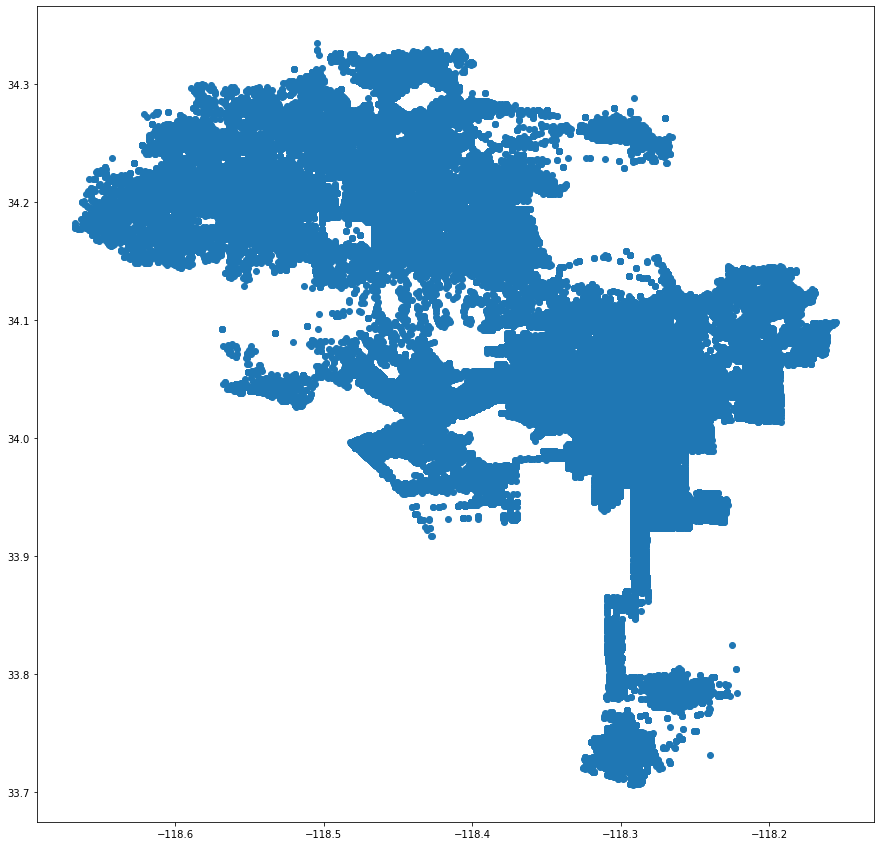

In [22]:
plt.figure(figsize=(15,15))
plt.scatter(locations_df["LON"],locations_df["LAT"])
plt.show()

In [ ]:
crime_data["Date Rptd"]

In [ ]:
date = pd.to_datetime(crime_data["Date Rptd"])
date.info()

In [ ]:
crime_data.info()

In [ ]:
pd.to_datetime(crime_data["DATE OCC"])
#time = pd.to_datetime(crime_data["TIME OCC"],format='%H:%M')

In [ ]:
date.head()

In [ ]:
time.head()

In [ ]:
newtime=pd.to_datetime(crime_data["TIME OCC"], format='%H%M').dt.time

In [ ]:
crime_data["TIME OCC"].value_counts()